<a href="https://colab.research.google.com/github/raufai02/Neuromechanics/blob/main/Neuromechanics_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

We are interested in modeling the force of a muscle as a function of activation,  length and velocity


Loading the Data:
- The following code works if you store the .mat file in your google drive in a subfolder called "Neuromechanics"




In [ ]:
#%reset
from google.colab import drive
drive.mount('/content/drive')


#!apt install octave

from scipy.io import loadmat
force_curves = loadmat('/content/drive/MyDrive/Neuromechanics/force_curves.mat')


#alternatively you can store a file in github and access it via the permalink and the !wget command

#!wget https://github.com/raufai02/Neuromechanics/blob/b73440d8d7ef1dbce68deac7a95e9ded28796b7a/force_curves.mat



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#%cd /content/drive/MyDrive/Neuromechanics
#!octave -W force_curves.m

Our Force-Velocity Curve variable is of the following format:

fvCurve = $\begin{bmatrix}
v_1 & f_1\\
\vdots& \vdots
\end{bmatrix}$

So we can extract the individual columns and create new variables


- fv: force calculated from varied velocity change at constant length
- v: input velocities for fv

- fv_int: interpolated force due to velocity


In [ ]:
#force_curves.mat contains 3 matrices: fvCurve, flaCurve, flpCurve
# each matrix has 2 columns, the second of which is the force data in each matrix
#in each matrix the first column is our explanatory variable (length, force)
fvCurve = force_curves['fvCurve']
from matplotlib import pyplot as plt

fv = fvCurve[:,1]

v = fvCurve[:,0]

#plt.plot(v, fv)
import numpy as np #for linspace
Vmax = max(v) #Vmax here is our maximum recorded velocity
Vmin = min(v)
#create a more robust domain of X(velocity) values: linespace of 100 values in range (Vmin, Vmax)
# if we want a new interpolated vector, we can use this linespace as the new set of velocities
ls = np.linspace(Vmin, Vmax, 100)


from scipy import interpolate

fv_int = interpolate.interp1d(v,fv) #interp1d returns a continuous function, not a new vector

fv_int = fv_int(ls)


The following code replicates the previous process of extracting vectors, interpolating the response variable vectors, for both active and passive length.
We then plot each separately. In the next section, we will combine the two variables (fa_int, fp_int) into one summated force due to length variable fLen.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


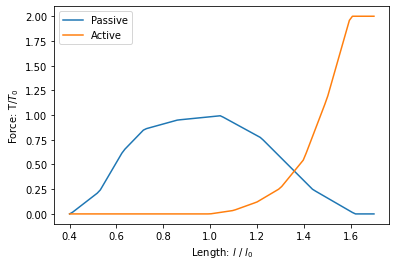

In [ ]:

flaCurve = force_curves['flaCurve']
fa = flaCurve[:,1]
la = flaCurve[:,0]
#plt.plot(la, fa)
flpCurve = force_curves['flpCurve']
fp = flpCurve[:,1]
lp = flpCurve[:,0]
#plt.plot(lp,fp)

fp_norm = [i/(max(fp)) for i in fp] #normalize vector by dividing each value by the max

ls_length = np.linspace(0.4, 1.7, 100) #query points for length: reduced range to relevant part of curve

fa_int = interpolate.interp1d(la, fa)
fp_int = interpolate.interp1d(lp, fp)

fa_int = fa_int(ls_length)
fp_int = fp_int(ls_length)

#PLOT active and passive curves
plt.plot(ls_length, fa_int)
plt.plot(ls_length, fp_int)
ax = plt.axes()
ax.set_ylabel("Force: T/$T_0$")
#plt.ylabel("Force: $\frac{5}{2}$")
#ax.set_ylabel("r'$frac{T}{T_max} $")
#$\frac{W}{ΔT}$
ax.set_xlabel("Length: $l$ / $l_0$")
ax.legend({"Active", "Passive"})

#add textbook figures

- Plot a family of F-L curves at different levels of activation, and a family of F-V curves at different levels of muscle activation


- We create an array of 10 activations [0, 0.1, ... 1.0]. For each activation, multiply the activation by the active force due to length to get the new force due to length for an active muscle. Sum this with the passive component to get the total force at a given length.
- We repeat a similar process for the F-V curves


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


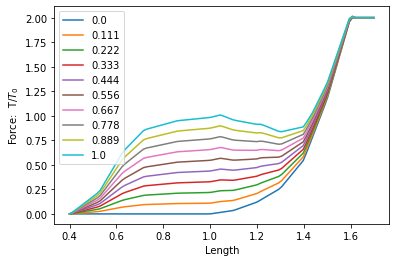

In [ ]:
"""
Code to plot full activation FL curve:
fLen = fa_int + fp_int
plt.plot(ls2, fLen)
"""

activations = np.linspace(0, 1.0, 10)
for a in activations:
  #multiply force active by activation constant
  #sum active and passive to get total FL value
  fa_act = fa_int * a
  forceTotal = fa_act + fp_int
  plt.plot(ls_length, forceTotal)

ax1 = plt.axes()
ax1.set_xlabel("Length")
ax1.set_ylabel("Force:  T/$T_0$")
#round the values in this legend
ax1.legend(np.round(activations, 3))
  #fv_act = fv * a



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


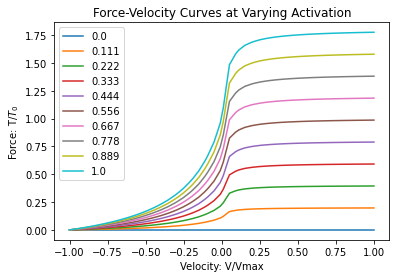

In [ ]:
# for each activation, multply the F-V curve by the activation and plot
ls_v = np.linspace(-1, 1, 100)
for a in activations:
  fv_act = fv_int * a
  plt.plot(ls_v, fv_act)
#Vmax = max velocity--> experiment dependent or calculated?
ax2 = plt.axes()
ax2.set_xlabel("Velocity: V/Vmax")
ax2.set_ylabel("Force: T/$T_0$")
plt.title("Force-Velocity Curves at Varying Activation")
ax2.legend(np.round(activations, 3))

Our non-normalized FV curve shows a positive relationship between velocity and force. We can compare this to the classical F-V curve found in the McMahon text and observe that our figure is reversed. 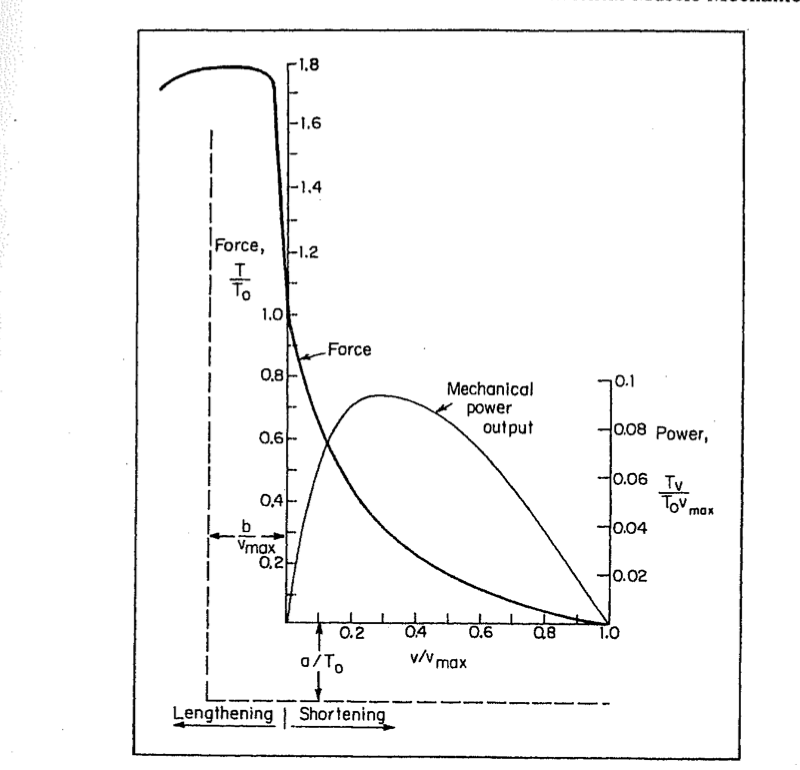

Thus, in our dataset we are arbitrarily measuring positive velocities as lengthening and negative velocities as shortening of the muscle.

Plot a 3-D surface of absolute force at maximal activation


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(100, 100)


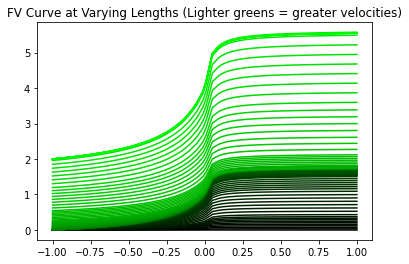

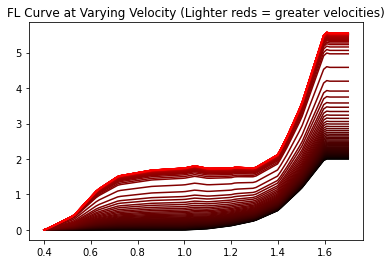

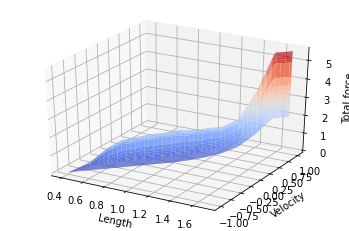

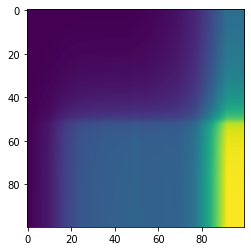

In [ ]:
fLen = fa_int + fp_int

from matplotlib import cm
from matplotlib import ticker as ticker
from mpl_toolkits import mplot3d
# np.meshgrid makes a 2D grid from our 2 input vectors (F-L and F-V data)
fv_act = fv_int * 1.0
fla_mesh,fv_mesh = np.meshgrid(fLen,fv_act)



#we can think of our function as mapping an input Length, Velocity(X,Y) value on the grid to an
#output on the Z axis (force)
#total force equals FLA time FV plus FLP

f_tot1 = (fla_mesh*fv_mesh)+fp_int

f_tot = (np.multiply(fla_mesh, fv_mesh)) + fp_int


for i in range(0, 100):
  fv_l = f_tot[:,i]
  plt.plot(ls_v, fv_l, color = [0, (i/100), 0] )
plt.title("FV Curve at Varying Lengths (Lighter greens = greater velocities)")
ax2 = plt.axes()
plt.figure()

for j in range(0, 100):
  fv_v = f_tot[j,:]
  plt.plot(ls_length, fv_v, color = [(j/100), 0, 0])

plt.title("FL Curve at Varying Velocity (Lighter reds = greater velocities)")

#print(ls_v(0))


#print(np.mean(f_tot1-f_tot))
print(np.shape(f_tot))

# try to call a matlab script to generate a 3D plot ?

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ls_length,ls_v,f_tot,cmap=cm.coolwarm)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
# ax.zaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_xlabel('Length')
ax.set_ylabel('Velocity')
ax.set_zlabel('Total force')

plt.figure()
ax3 = plt.axes()
ax3.imshow(f_tot, extent= None)

#print(f_tot)


No we seek to plot Power as a function of normalized shortening velocity.

Since power is measured as work over time, we can compute it by multiplying the force produced by the velocity applied to the muscle at each time point.


---


Power = $\frac{W}{ΔT}$ = $\frac{{F}{⋅}{d}}{∆T}$ = $ F⋅v $

**IMPORT MATLAB generated surface plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


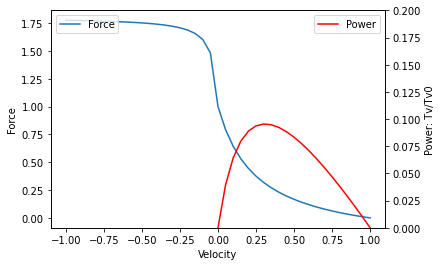

In [ ]:
fv = list(fv)
fp_norm = [i/(max(fp)) for i in fp] #normalize vector
Vprime = [(-i/Vmax) for i in v]#iteratively divide by max,
#multiply by negative 1 to flip our curve so we get a traditional FV plot

P = [abs(Vprime[i] * fv[i]) for i in range(0,len(Vprime))]

Pidx = [i >= 0 for i in Vprime]
for x in range(len(P)):
  if Pidx[x] == False:
    P[x] = float("nan")

P_int = interpolate.interp1d(Vprime, P, bounds_error = False, fill_value = 0)
ls3 = np.linspace(0, 1.0, 100)



plt.plot(Vprime, fv);
ax = plt.axes()
ax2 = ax.twinx()
ax2.plot(Vprime, P, '-r', label='Power')
ax2.set_ylim(0, 0.2)
ax.set_xlabel("Velocity");
ax.set_ylabel("Force");
ax2.set_ylabel("Power: Tv/Tv0")


ax.legend({"Force"}, loc = "upper left")
ax2.legend({"Power"})


Here we flip the FV curve to match our traditional Hill model, with shortening = positive velocity and lengthening = negative velocity.

**Problem 3**: Apply a sinusoidal muscle fiber length change to your model (start with amplitude: 0.5L0 and 1Hz with 0.5 constant activation), and calculate the muscle forces as function of length and velocity. Plot the muscle power over time. Change the magnitude and frequency of the sinusoid applied to the muscle. How do these changes affect muscle power output?




- We can model the length change using the following equation over a 10 second interval
  - $L(x) = 0.5\sin(2πx)$

- The velocity will hence be the derivative of the specified sine wave
  - $V(x) = 2π(0.5)(\sin(2πx)) = π\sin(2πx)$

- We normalize our velocity by dividing by Vmax, the maximum velocity at which a muscle can stretch before no force is produced. (On F-V curve, this is the point where $F = 0$ , at $ v/v_{max} = 1.0$,  or $v = v_{max} $
- Since we have not calculated Vmax, we will estimate it as 10 resting lengths per second

<Figure size 432x288 with 0 Axes>

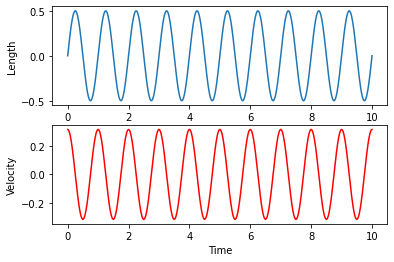

In [ ]:
import math
pi = math.pi

timeseries = np.linspace(0, 10, 1000) #domain of our function: 1000 samples from 0 to 10
# simulates a 10 second sampling period

sine = 0.5 * np.sin(timeseries * pi * 2) #1 HZ sine wave: 0.5sin(2πx)

plt.figure(2)

fig, (ax1,ax2) = plt.subplots(2)
ax1.set_xlabel("Time")
ax1.set_ylabel("Length")
ax1.plot(timeseries, sine)


#velocity is the derivative of our length function
# d/dx(asin(kx)) = akcos(kx) = 0.5 * 2π * cos(2πx)
vel = 0.5 * 2 * pi * np.cos(timeseries * pi * 2)



#start with Vmax = 10 * l_0
Vmax2 = 10 #arbitrarily set Vmax to 5 times resting length
vel = vel / Vmax2


ax2.set_xlabel("Time")
ax2.set_ylabel("Velocity") #Fiber lengths per second
ax2.plot(timeseries, vel, "-r")

We will now look up the corresponding length and velocity on our F-L and F-V curves for each time point to generate a force value.


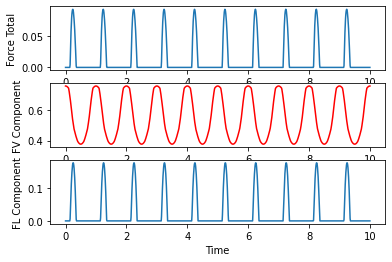

In [ ]:
## write out equations in text

activation = 0.5 #constant activation
total = np.ndarray([1000, 1])
sine_int = interpolate.interp1d(timeseries, sine)
vel_int = interpolate.interp1d(timeseries, vel, bounds_error = False, fill_value = 0)
fLen_int = interpolate.interp1d(ls_length, fLen,bounds_error = False, fill_value = 0)
fv_int_new = interpolate.interp1d(ls_v, fv_int)
#print(len(fv_int))

fv_time = np.ndarray([1000, 1])
fl_time = np.ndarray([1000, 1])
power = np.ndarray([1000, 1])


Vmax2 = 5 #arbitrarily set Vmax to 5 times resting length

Vprime2 = [(-i/Vmax2) for i in v]#normalize velocities
P = [abs(Vprime2[i] * fv[i]) for i in range(0,len(Vprime))]




#for every time point, calculate the length, velocity, and
#corresponding force and power
for j in range(len(timeseries)):
  i = timeseries[j]
  length = sine_int(i)
  #here we use normalized velocity (ie Vprime like in Power calculation)
  vel_inst = vel_int(i)/Vmax2

  fl = fLen_int(length)
  f_vel = fv_int_new(vel_inst) * activation
  fv_time[j] = f_vel
  fl_time[j] = fl
  #total[j] = f_vel * activation * fl #total force
  total[j] = f_vel * fl

  if vel_inst >= 0:
    power[j] = f_vel * vel_inst
  else:
    power[j] = 0


#Plots:
fig, (ax1,ax2, ax3) = plt.subplots(3)
ax1.set_xlabel("Time")
ax1.set_ylabel("Force Total")
ax1.plot(timeseries, total)


ax2.set_xlabel("Time")
ax2.set_ylabel("FV Component")
ax2.plot(timeseries, fv_time, "-r")

ax3.set_xlabel("Time")
ax3.set_ylabel("FL Component")
ax3.plot(timeseries, fl_time)

# plt.figure(1)
# plt.subplot(311)
# plt.plot(timeseries, total)
# plt.subplot(312)
# plt.plot(timeseries, fv_time)
# plt.subplot(313)
# plt.plot(timeseries, fl_time)





We observe that the force over time behaves very similarly to the FL component over time, although scaled down due to multiplication with the FV component

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Power')

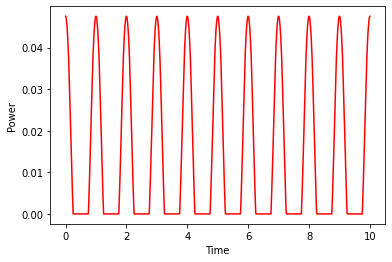

In [ ]:
#POWER:

plt.plot(timeseries, power, "-r")
ax = plt.axes()
ax.set_xlabel("Time")
ax.set_ylabel("Power")

**Problem 4**: Building on problem 3, activate the muscle with 25% duty cycle in each sinusoidal length change and plot muscle power over time. Then shift the phase of the activation during the sinusoidal length change for a given amplitude and frequency; plot power over time and compute average work per cycle. How does the timing of the activation affect the power and work output of the muscle?



- A duty cycle or power cycle is the fraction of one period in which a signal or system is active.
  - Thus we create a square wave function for activation


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


Text(0, 0.5, 'Activation')

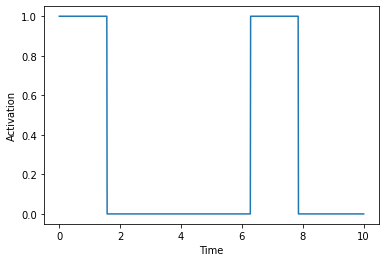

In [ ]:

from scipy import signal

#NONNEGATIVE WAVE WITH MAX = 1

activation_pulse = (0.5) * (signal.square(timeseries, duty = 0.25) + 1)

plt.plot(timeseries, activation_pulse)
ax = plt.axes()
ax.set_xlabel("Time")
ax.set_ylabel("Activation")

Now we can repeat the same code as above, except in our calculations instead of a constant activation we get the activation from the above plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'Power')

<Figure size 432x288 with 0 Axes>

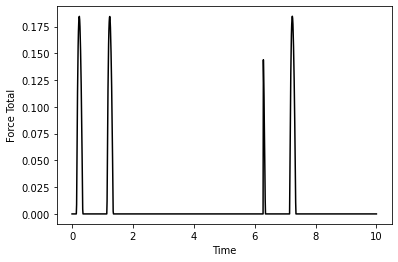

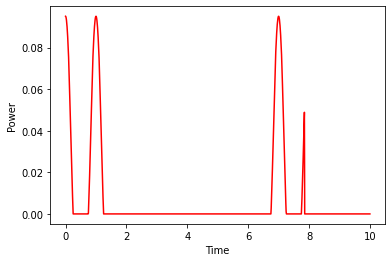

In [ ]:

for j in range(len(timeseries)):
  i = timeseries[j]
  length = sine_int(i)
  vel_inst = vel_int(i)/Vmax2
  #print(vel_inst)
  fl = fLen_int(length)
  f_vel = fv_int_new(vel_inst) * activation_pulse[j]
  fv_time[j] = f_vel
  fl_time[j] = fl
  total[j] = f_vel * fl #total force

  if vel_inst >= 0:
    power[j] = f_vel * vel_inst
  else:
    power[j] = 0


plt.figure(2)
fig, (ax2, ax3, ax4) = plt.subplots(3)

ax1 = plt.axes()
ax1.set_xlabel("Time")
ax1.set_ylabel("Force Total")
ax1.plot(timeseries, total, "-k")


ax2.set_xlabel("Time")
ax2.set_ylabel("FV Component")
ax2.plot(timeseries, fv_time, "-y")

ax3.set_xlabel("Time")
ax3.set_ylabel("FL Component")
ax3.plot(timeseries, fl_time, "-g")


ax4.set_xlabel("Time")
ax4.set_ylabel("Activation")
ax4.plot(timeseries, activation_pulse)


plt.figure()
plt.plot(timeseries, power, "-r")
ax = plt.axes()
ax.set_xlabel("Time")
ax.set_ylabel("Power")

Compute Average Work Per Cycle: W = F* displacement = integral of power


In [ ]:

from scipy.integrate import simps
from numpy import trapz

powerList = [0] * 1000

#power is currently a list of numpy arrays, each with one element.
#this code creates an equivalent list of numerical values that is suitable for our integration function
for i in range(len(power)):
  powerList[i] = power[i][0]


#Simpson's rule area under the curve (integration) approximation
area = simps(powerList, timeseries)

print("Work done over 10 seconds: ", area, " joules")



Work done over 10 seconds:  0.07435652032981173  joules
